### **EXPLORATORY DATA ANALYSIS**

In [1]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and format csv file.
df = pd.read_csv('ycombinator.csv')
df.set_index("Unnamed: 0", inplace = True)
df.rename_axis(index = "", inplace = True)
df.head(5)

,Company_name,Company_tag,Short_description,Founded,Location,Country,Team_size,Website,Active_founders,Company_social_media,Founders_info,Description
,,,,,,,,,,,,
0,Airbnb,"['W09', 'Public', 'Marketplace', 'Travel']",Book accommodations around the world.,2008.0,"San Francisco, CA, USA",USA,5000.0,http://airbnb.com,"['Nathan Blecharczyk', 'Brian Chesky', 'Joe Ge...","['https://www.linkedin.com/company/airbnb/', '...","[{'name': 'Nathan Blecharczyk', 'role': 'CTO',...",Founded in August of 2008 and based in San Fra...
1,Coinbase,"['S12', 'Public']","Buy, sell, and manage cryptocurrencies.",2012.0,"San Francisco, CA, USA",USA,500.0,https://www.coinbase.com,['Brian Armstrong'],"['https://twitter.com/coinbase', 'https://www....","[{'name': 'Brian Armstrong', 'role': 'CEO', 's...","Founded in June of 2012, Coinbase is a digital..."
2,DoorDash,"['S13', 'Public', '10']",Restaurant delivery.,NaN,"San Francisco, CA, USA",USA,1600.0,http://doordash.com,"['Andy Fang', 'Stanley Tang', 'Tony Xu']","['https://www.linkedin.com/company/doordash/',...","[{'name': 'Andy Fang', 'role': 'Founder', 'soc...","Founded in 2013, DoorDash is a San Francisco-b..."
3,GitLab,"['W15', 'Public', 'DevSecOps', 'Developer Tools']",A complete DevOps platform delivered as a sing...,2012.0,"San Francisco, CA, USA",USA,1200.0,http://gitlab.com/,"['Sid Sijbrandij', 'Dmitriy Zaporozhets']",['https://www.linkedin.com/company/gitlab-com'...,"[{'name': 'Sid Sijbrandij', 'role': 'CEO', 'so...",GitLab is the first single application for the...
4,Dropbox,"['S07', 'Public']",Backup and share files in the cloud.,2008.0,"San Francisco, CA, USA",USA,4000.0,http://dropbox.com,"['Arash Ferdowsi', 'Drew Houston']","['https://www.linkedin.com/company/dropbox/', ...","[{'name': 'Arash Ferdowsi', 'role': '', 'socia...",Dropbox is building the world’s first smart wo...


In [3]:
# Print certain information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          1000 non-null   object 
 1   Company_tag           1000 non-null   object 
 2   Short_description     996 non-null    object 
 3   Founded               825 non-null    float64
 4   Location              984 non-null    object 
 5   Country               984 non-null    object 
 6   Team_size             987 non-null    float64
 7   Website               999 non-null    object 
 8   Active_founders       1000 non-null   object 
 9   Company_social_media  1000 non-null   object 
 10  Founders_info         1000 non-null   object 
 11  Description           972 non-null    object 
dtypes: float64(2), object(10)
memory usage: 101.6+ KB


From the above, it can be seen that only two of the features are numerical.

In [4]:
# Sum all the null values in each feature.
df.isna().sum()

Company_name              0
Company_tag               0
Short_description         4
Founded                 175
Location                 16
Country                  16
Team_size                13
Website                   1
Active_founders           0
Company_social_media      0
Founders_info             0
Description              28
dtype: int64

Some features in the scraped data contains null values as seen above. They are:
- Short_description,
- Founded,
- Location,
- Country,
- Team_size, 
- Website, and
- Description.

In [5]:
# Check for unique values in the features.
df.nunique()

Company_name            997
Company_tag             822
Short_description       996
Founded                  17
Location                200
Country                  55
Team_size               136
Website                 999
Active_founders         986
Company_social_media    938
Founders_info           987
Description             972
dtype: int64

As seen above, features with counts not equal to 1000 contains duplicates. This property is only useful for the Company_name feature since a case of repeated companies is not appropriate.

In [6]:
# Descriptive statistics of the object data types.
df.describe(include=[object])

,Company_name,Company_tag,Short_description,Location,Country,Website,Active_founders,Company_social_media,Founders_info,Description
count,1000,1000,996,984,984,999,1000,1000,1000,972
unique,997,822,996,200,55,999,986,938,987,972
top,Nash,"['W22', 'Active']",Book accommodations around the world.,"San Francisco, CA, USA",USA,http://airbnb.com,[],[],[],Founded in August of 2008 and based in San Fra...
freq,2,20,1,287,654,1,13,63,13,1


In [7]:
# Descriptive statistics of the numerical features.
df.describe()

,Founded,Team_size
count,825.000000,987.000000
mean,2017.980606,91.346505
std,3.518621,300.987694
min,2006.000000,0.000000
25%,2015.000000,4.000000
50%,2020.000000,12.000000
75%,2021.000000,54.500000
max,2022.000000,5000.000000


In [8]:
# Check for features that contains the '[]' character.

filt1 = df['Short_description'] == '[]'
print(filt1.value_counts())
print('\n')

filt2 = df['Founded'] == '[]'
print(filt2.value_counts())
print('\n')

filt3 = df['Location'] == '[]'
print(filt3.value_counts())
print('\n')

filt4 = df['Country'] == '[]'
print(filt4.value_counts())
print('\n')

filt5 = df['Team_size'] == '[]'
print(filt5.value_counts())
print('\n')

filt6 = df['Website'] == '[]'
print(filt6.value_counts())
print('\n')

filt7 = df['Active_founders'] == '[]'
print(filt7.value_counts())
print('\n')

filt8 = df['Company_social_media'] == '[]'
print(filt8.value_counts())
print('\n')

filt9 = df['Founders_info'] == '[]'
print(filt9.value_counts())
print('\n')

filt10 = df['Description'] == '[]'
print(filt10.value_counts())


False    1000
Name: Short_description, dtype: int64


False    1000
Name: Founded, dtype: int64


False    1000
Name: Location, dtype: int64


False    1000
Name: Country, dtype: int64


False    1000
Name: Team_size, dtype: int64


False    1000
Name: Website, dtype: int64


False    987
True      13
Name: Active_founders, dtype: int64


False    937
True      63
Name: Company_social_media, dtype: int64


False    987
True      13
Name: Founders_info, dtype: int64


False    1000
Name: Description, dtype: int64


It is seen that 3 features contains the '[]' character i.e. Active_founders, Company_social_media and Founders_info. The character can be replaced with a "Nil" tag.

In [9]:
df.replace('[]', 'Nil', inplace=True)

In [10]:
# Check again for features that contains the '[]' character.

filt1 = df['Short_description'] == '[]'
print(filt1.value_counts())
print('\n')

filt2 = df['Founded'] == '[]'
print(filt2.value_counts())
print('\n')

filt3 = df['Location'] == '[]'
print(filt3.value_counts())
print('\n')

filt4 = df['Country'] == '[]'
print(filt4.value_counts())
print('\n')

filt5 = df['Team_size'] == '[]'
print(filt5.value_counts())
print('\n')

filt6 = df['Website'] == '[]'
print(filt6.value_counts())
print('\n')

filt7 = df['Active_founders'] == '[]'
print(filt7.value_counts())
print('\n')

filt8 = df['Company_social_media'] == '[]'
print(filt8.value_counts())
print('\n')

filt9 = df['Founders_info'] == '[]'
print(filt9.value_counts())
print('\n')

filt10 = df['Description'] == '[]'
print(filt10.value_counts())


False    1000
Name: Short_description, dtype: int64


False    1000
Name: Founded, dtype: int64


False    1000
Name: Location, dtype: int64


False    1000
Name: Country, dtype: int64


False    1000
Name: Team_size, dtype: int64


False    1000
Name: Website, dtype: int64


False    1000
Name: Active_founders, dtype: int64


False    1000
Name: Company_social_media, dtype: int64


False    1000
Name: Founders_info, dtype: int64


False    1000
Name: Description, dtype: int64


The features containing the "[]" character has been tagged with "Nil".

#### **FEATURE ENGINEERING**

A new feature that highlights the number of founders in each company can be created.

In [11]:
# Create a Number_of_founders column.

hold = []
for i in df['Active_founders']:
    if i == 'Nil':
        hold.append(0)
    else:
        j = i.split(',')
        hold.append(len(j))
    

df['Number_of_founders'] = hold

In [12]:
df.head(5)

,Company_name,Company_tag,Short_description,Founded,Location,Country,Team_size,Website,Active_founders,Company_social_media,Founders_info,Description,Number_of_founders
,,,,,,,,,,,,,
0,Airbnb,"['W09', 'Public', 'Marketplace', 'Travel']",Book accommodations around the world.,2008.0,"San Francisco, CA, USA",USA,5000.0,http://airbnb.com,"['Nathan Blecharczyk', 'Brian Chesky', 'Joe Ge...","['https://www.linkedin.com/company/airbnb/', '...","[{'name': 'Nathan Blecharczyk', 'role': 'CTO',...",Founded in August of 2008 and based in San Fra...,3
1,Coinbase,"['S12', 'Public']","Buy, sell, and manage cryptocurrencies.",2012.0,"San Francisco, CA, USA",USA,500.0,https://www.coinbase.com,['Brian Armstrong'],"['https://twitter.com/coinbase', 'https://www....","[{'name': 'Brian Armstrong', 'role': 'CEO', 's...","Founded in June of 2012, Coinbase is a digital...",1
2,DoorDash,"['S13', 'Public', '10']",Restaurant delivery.,NaN,"San Francisco, CA, USA",USA,1600.0,http://doordash.com,"['Andy Fang', 'Stanley Tang', 'Tony Xu']","['https://www.linkedin.com/company/doordash/',...","[{'name': 'Andy Fang', 'role': 'Founder', 'soc...","Founded in 2013, DoorDash is a San Francisco-b...",3
3,GitLab,"['W15', 'Public', 'DevSecOps', 'Developer Tools']",A complete DevOps platform delivered as a sing...,2012.0,"San Francisco, CA, USA",USA,1200.0,http://gitlab.com/,"['Sid Sijbrandij', 'Dmitriy Zaporozhets']",['https://www.linkedin.com/company/gitlab-com'...,"[{'name': 'Sid Sijbrandij', 'role': 'CEO', 'so...",GitLab is the first single application for the...,2
4,Dropbox,"['S07', 'Public']",Backup and share files in the cloud.,2008.0,"San Francisco, CA, USA",USA,4000.0,http://dropbox.com,"['Arash Ferdowsi', 'Drew Houston']","['https://www.linkedin.com/company/dropbox/', ...","[{'name': 'Arash Ferdowsi', 'role': '', 'socia...",Dropbox is building the world’s first smart wo...,2


#### **DATA VISUALIZATION**

#### UNIVARIATE ANALYSIS

In [13]:
df['Company_name'].value_counts()

Nash               2
Streak             2
Atlas              2
goodfin            1
Campfire           1
                  ..
Wink Health        1
Transcriptic       1
Zenflow            1
Tab                1
Humane Genomics    1
Name: Company_name, Length: 997, dtype: int64

The repeated companies are Nash, Streak and Atlas and they appeared twice in the dataset. This issue is not from the scraper but from the website being scraped.

In [14]:
# Confirm the duplicated companies shown above.
df['Company_name'].duplicated().sum()

3

The above confirms the 3 companies that are duplicated twice.

In [15]:
df['Location'].value_counts()

San Francisco, CA, USA         287
New York, NY, USA               76
Los Angeles, CA, USA            31
Bengaluru, Karnataka, India     29
London, UK                      25
                              ... 
Bothell, WA, USA                 1
Virginia Beach, VA, USA          1
Kraków, Poland                   1
Portland, OR, USA                1
Tbilisi, Georgia                 1
Name: Location, Length: 200, dtype: int64

From the above, it can be inferred that most of the companies are located in San Francisco, CA, USA.

Text(0.5, 1.0, 'Countplot of Aggregated Country of Each Company')

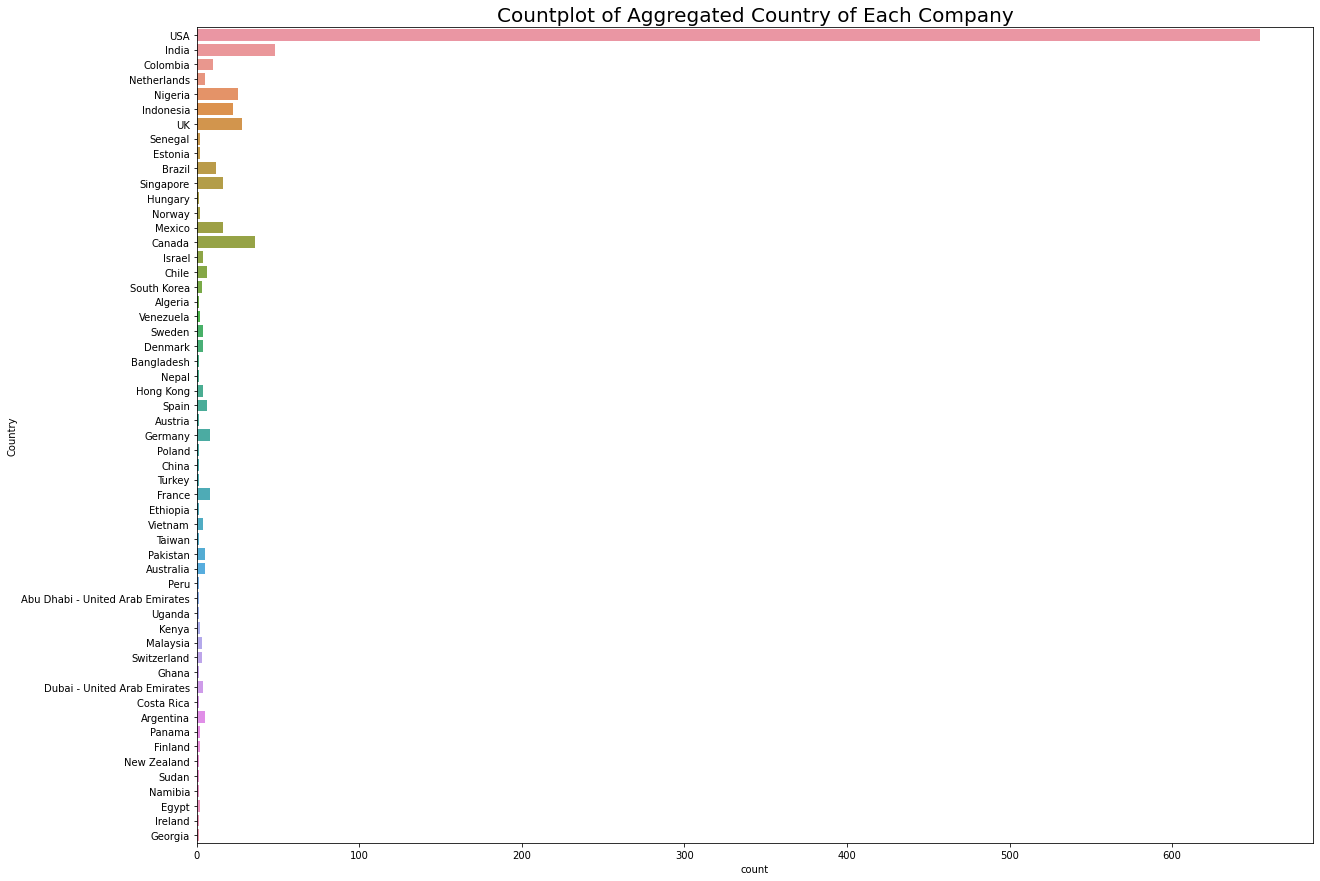

In [16]:
# Set plot size.
plt.figure(figsize=(20, 15))

# Plot type.
sns.countplot(y = df['Country'], data = df)

# Title.
plt.title('Countplot of Aggregated Country of Each Company', fontsize=20)

# plt.savefig('output1.png', facecolor = 'w')

In [17]:
df['Country'].value_counts()

USA                                 654
India                                48
Canada                               36
UK                                   28
Nigeria                              25
Indonesia                            22
Mexico                               16
Singapore                            16
Brazil                               12
Colombia                             10
France                                8
Germany                               8
Spain                                 6
Chile                                 6
Pakistan                              5
Netherlands                           5
Australia                             5
Argentina                             5
Hong Kong                             4
Dubai - United Arab Emirates          4
Vietnam                               4
Sweden                                4
Israel                                4
Denmark                               4
South Korea                           3


From the figure and descriptive statistics above, the most represented country home to the most companies is the USA with an overwhelming count of 654 out oof a total of 1000 companies. It is followed by India, Canada, UK ....

Text(0.5, 1.0, 'Countplot of Aggregated Year Each Company was Founded')

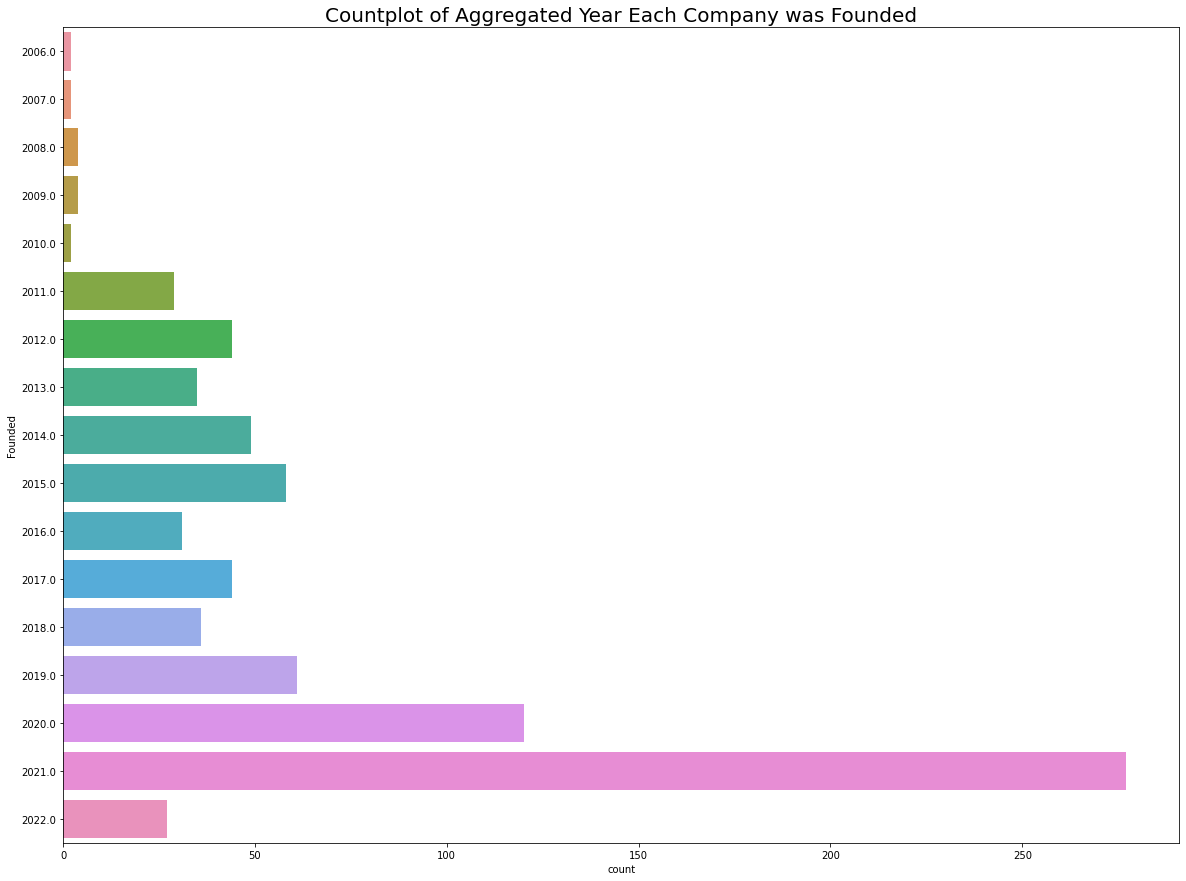

In [18]:
# Set plot size.
plt.figure(figsize=(20, 15))

# Plot type.
sns.countplot(y = df['Founded'], data = df)

# Title.
plt.title('Countplot of Aggregated Year Each Company was Founded', fontsize=20)

# plt.savefig('output2.png', facecolor = 'w')

In [19]:
df['Founded'].value_counts()

2021.0    277
2020.0    120
2019.0     61
2015.0     58
2014.0     49
2017.0     44
2012.0     44
2018.0     36
2013.0     35
2016.0     31
2011.0     29
2022.0     27
2009.0      4
2008.0      4
2006.0      2
2007.0      2
2010.0      2
Name: Founded, dtype: int64

From the figure and descriptive statistics above, most of the companies recorded were founded in the year 2021.

In [20]:
filt = df['Country'] == 'USA'
df.loc[filt]['Founded'].value_counts()

2021.0    143
2020.0     56
2015.0     44
2014.0     40
2012.0     39
2017.0     34
2019.0     29
2013.0     29
2016.0     25
2011.0     21
2018.0     18
2022.0     18
2009.0      4
2008.0      4
2006.0      2
2007.0      2
2010.0      2
Name: Founded, dtype: int64

Even within the USA that is home to most of the companies, 2021 has has the highest recorded founding date. This same analysis can be applied to other countries. 

In [21]:
# Descriptive statistics of the team size of each company.
df['Team_size'].describe()

count     987.000000
mean       91.346505
std       300.987694
min         0.000000
25%         4.000000
50%        12.000000
75%        54.500000
max      5000.000000
Name: Team_size, dtype: float64

The descriptive statistics above shows some notable details on the team_size of the companies.

Text(0.5, 1.0, 'Team-size Distribution')

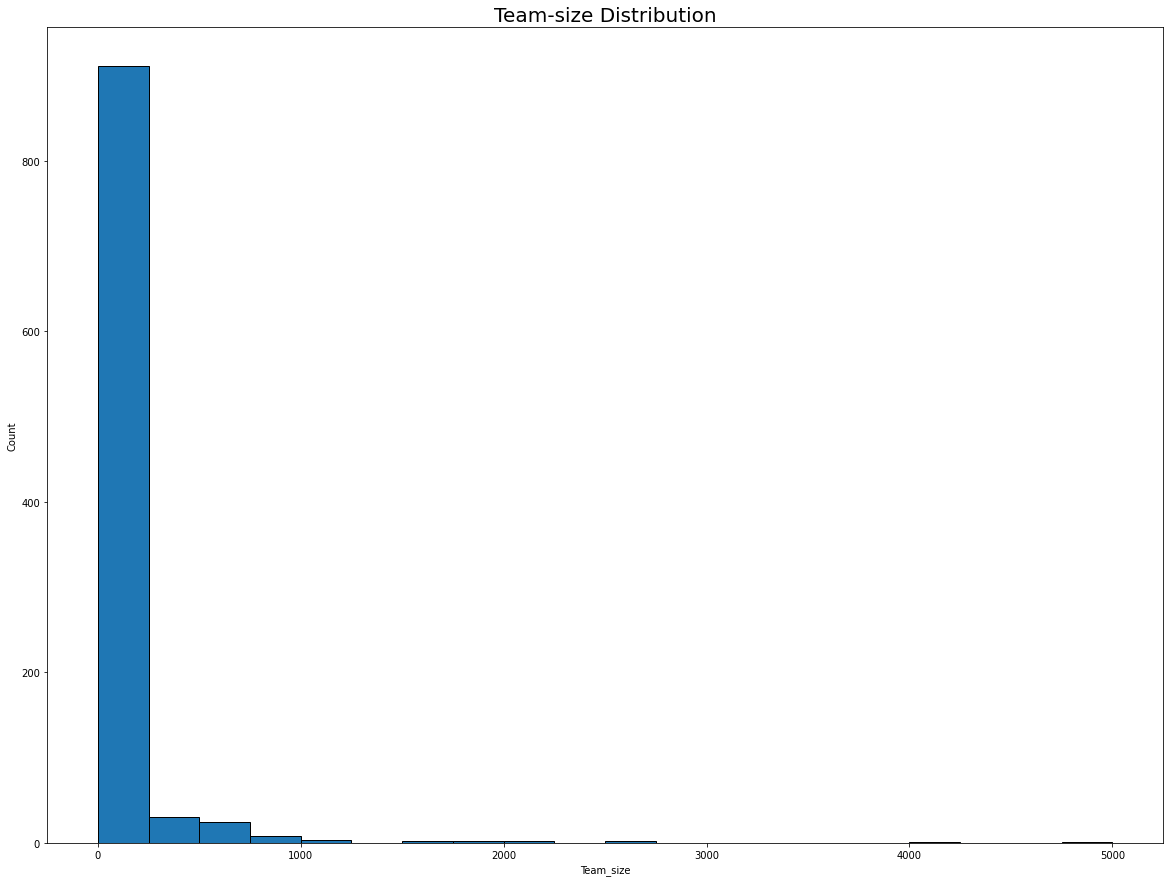

In [22]:
# Set plot size.
sns.set
plt.figure(figsize=(20, 15))

# Plot type
sns.histplot(x = df['Team_size'], data = df, bins=20, alpha = 1)

# Title.
plt.title('Team-size Distribution', fontsize=20)

# plt.savefig('output3.png', facecolor = 'w')

In [23]:
df['Team_size'].value_counts()

2.0      125
3.0       81
4.0       47
5.0       43
10.0      37
        ... 
355.0      1
310.0      1
188.0      1
330.0      1
27.0       1
Name: Team_size, Length: 136, dtype: int64

From the figure and descriptive statistics above, most Team_size falls within the range of 2-10 and a right-skewed plot is noticed in that regard.

In [24]:
filt = df['Country'] == 'USA'
df.loc[filt]['Team_size'].value_counts()

2.0       103
3.0        54
4.0        36
11.0       24
5.0        19
         ... 
161.0       1
750.0       1
520.0       1
1900.0      1
0.0         1
Name: Team_size, Length: 119, dtype: int64

The above count shows that most of the companies in the USA has a Team_size of 2. This pattern of analysis can be applied to other countries.

Text(0.5, 1.0, 'Countplot of Aggregated Number of Founders of each Company')

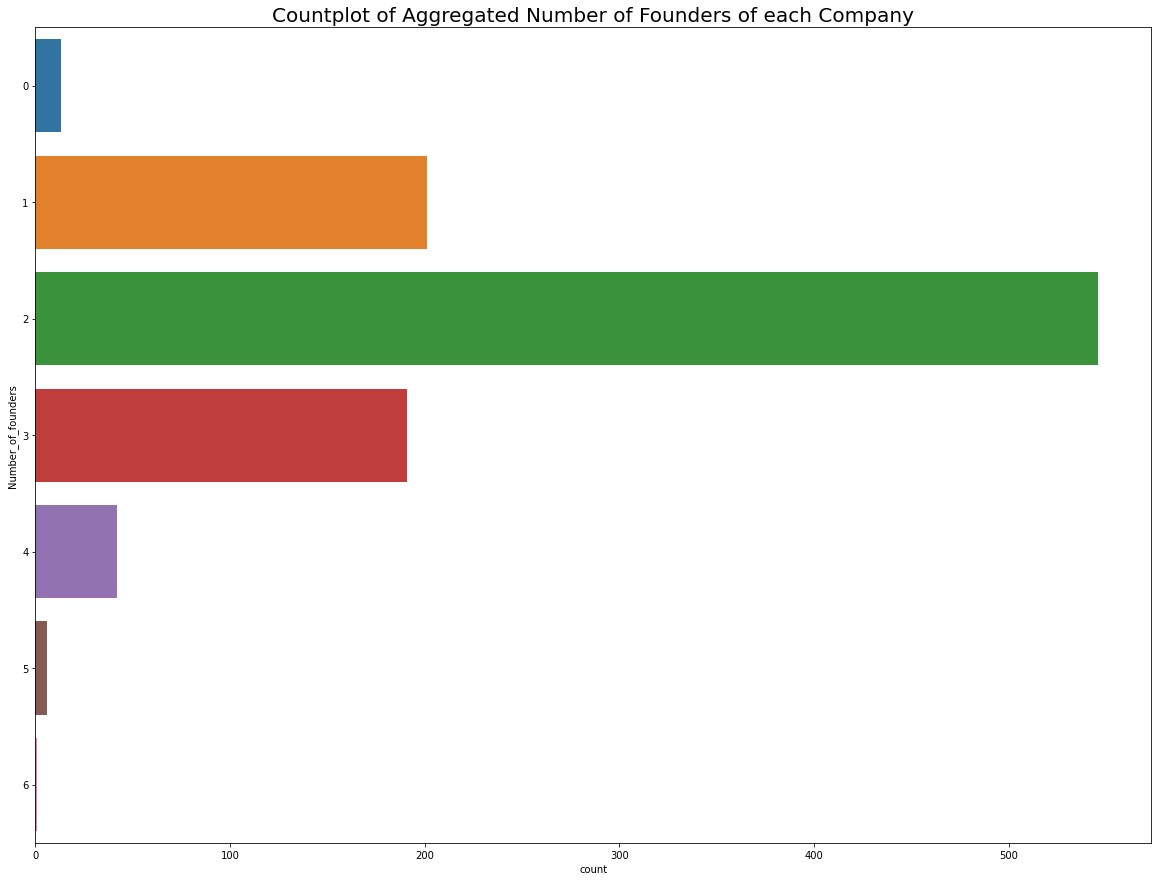

In [25]:
# Set plot size.
plt.figure(figsize=(20, 15))

# Plot type.
sns.countplot(y = df['Number_of_founders'], data = df)

# Title.
plt.title('Countplot of Aggregated Number of Founders of each Company', fontsize=20)

# plt.savefig('output4.png', facecolor = 'w')

In [26]:
df['Number_of_founders'].value_counts()

2    546
1    201
3    191
4     42
0     13
5      6
6      1
Name: Number_of_founders, dtype: int64

From the figure and descriptive statistics above, 546 companies out of a 1000 had just 2 founders, followed by 214 companies with 1 founder and 191 companies with 3 founders.

In [27]:
filt = df['Country'] == 'USA'
df.loc[filt]['Number_of_founders'].value_counts()

2    362
1    154
3    108
4     14
0     12
5      3
6      1
Name: Number_of_founders, dtype: int64

From the above, most of the compaies in the USA have just 2 founders. A similar pattern of analysis can be adopted for other countries.

In [28]:
# Groupby country.
country_grp = df.groupby(['Country'])

In [29]:
# View only companies in the USA.
country_grp.get_group('USA')

,Company_name,Company_tag,Short_description,Founded,Location,Country,Team_size,Website,Active_founders,Company_social_media,Founders_info,Description,Number_of_founders
,,,,,,,,,,,,,
0,Airbnb,"['W09', 'Public', 'Marketplace', 'Travel']",Book accommodations around the world.,2008.0,"San Francisco, CA, USA",USA,5000.0,http://airbnb.com,"['Nathan Blecharczyk', 'Brian Chesky', 'Joe Ge...","['https://www.linkedin.com/company/airbnb/', '...","[{'name': 'Nathan Blecharczyk', 'role': 'CTO',...",Founded in August of 2008 and based in San Fra...,3
1,Coinbase,"['S12', 'Public']","Buy, sell, and manage cryptocurrencies.",2012.0,"San Francisco, CA, USA",USA,500.0,https://www.coinbase.com,['Brian Armstrong'],"['https://twitter.com/coinbase', 'https://www....","[{'name': 'Brian Armstrong', 'role': 'CEO', 's...","Founded in June of 2012, Coinbase is a digital...",1
2,DoorDash,"['S13', 'Public', '10']",Restaurant delivery.,NaN,"San Francisco, CA, USA",USA,1600.0,http://doordash.com,"['Andy Fang', 'Stanley Tang', 'Tony Xu']","['https://www.linkedin.com/company/doordash/',...","[{'name': 'Andy Fang', 'role': 'Founder', 'soc...","Founded in 2013, DoorDash is a San Francisco-b...",3
3,GitLab,"['W15', 'Public', 'DevSecOps', 'Developer Tools']",A complete DevOps platform delivered as a sing...,2012.0,"San Francisco, CA, USA",USA,1200.0,http://gitlab.com/,"['Sid Sijbrandij', 'Dmitriy Zaporozhets']",['https://www.linkedin.com/company/gitlab-com'...,"[{'name': 'Sid Sijbrandij', 'role': 'CEO', 'so...",GitLab is the first single application for the...,2
4,Dropbox,"['S07', 'Public']",Backup and share files in the cloud.,2008.0,"San Francisco, CA, USA",USA,4000.0,http://dropbox.com,"['Arash Ferdowsi', 'Drew Houston']","['https://www.linkedin.com/company/dropbox/', ...","[{'name': 'Arash Ferdowsi', 'role': '', 'socia...",Dropbox is building the world’s first smart wo...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Caire Health,"['S21', 'Active', 'medical device', 'Artifical...",Semi-Autonomous Diagnostics for Emergent Care,2021.0,"Florida, USA",USA,3.0,http://cairehealth.com,"['Anmol Warman', 'Pranav Warman', 'Roshan Warm...",Nil,"[{'name': 'Anmol Warman', 'role': 'Founder', '...",Caire Health's AI software reports imaging dia...,3
995,Dime,"['S21', 'Active', '1']",Turn your content into unique digital collecti...,2021.0,"San Francisco, CA, USA",USA,2.0,https://www.dime.io/,"['Aaron Barbieri-Aghib', 'Ben Share']",['https://www.linkedin.com/company/dimecreate/...,"[{'name': 'Aaron Barbieri-Aghib', 'role': '', ...",Dime lets creators turn their content into uni...,2
996,Telivy,"['S21', 'Active', '1']",Fastest way to purchase cyber insurance for sm...,2021.0,"San Francisco, CA, USA",USA,6.0,https://www.telivy.com,"['Naren Sathiya', 'Vijay Ventrapragada']","['https://www.linkedin.com/company/telivy/', '...","[{'name': 'Naren Sathiya', 'role': '', 'social...",Telivy’s empowers SAAS platforms and insurance...,2


#### BIVARIATE ANALYSIS

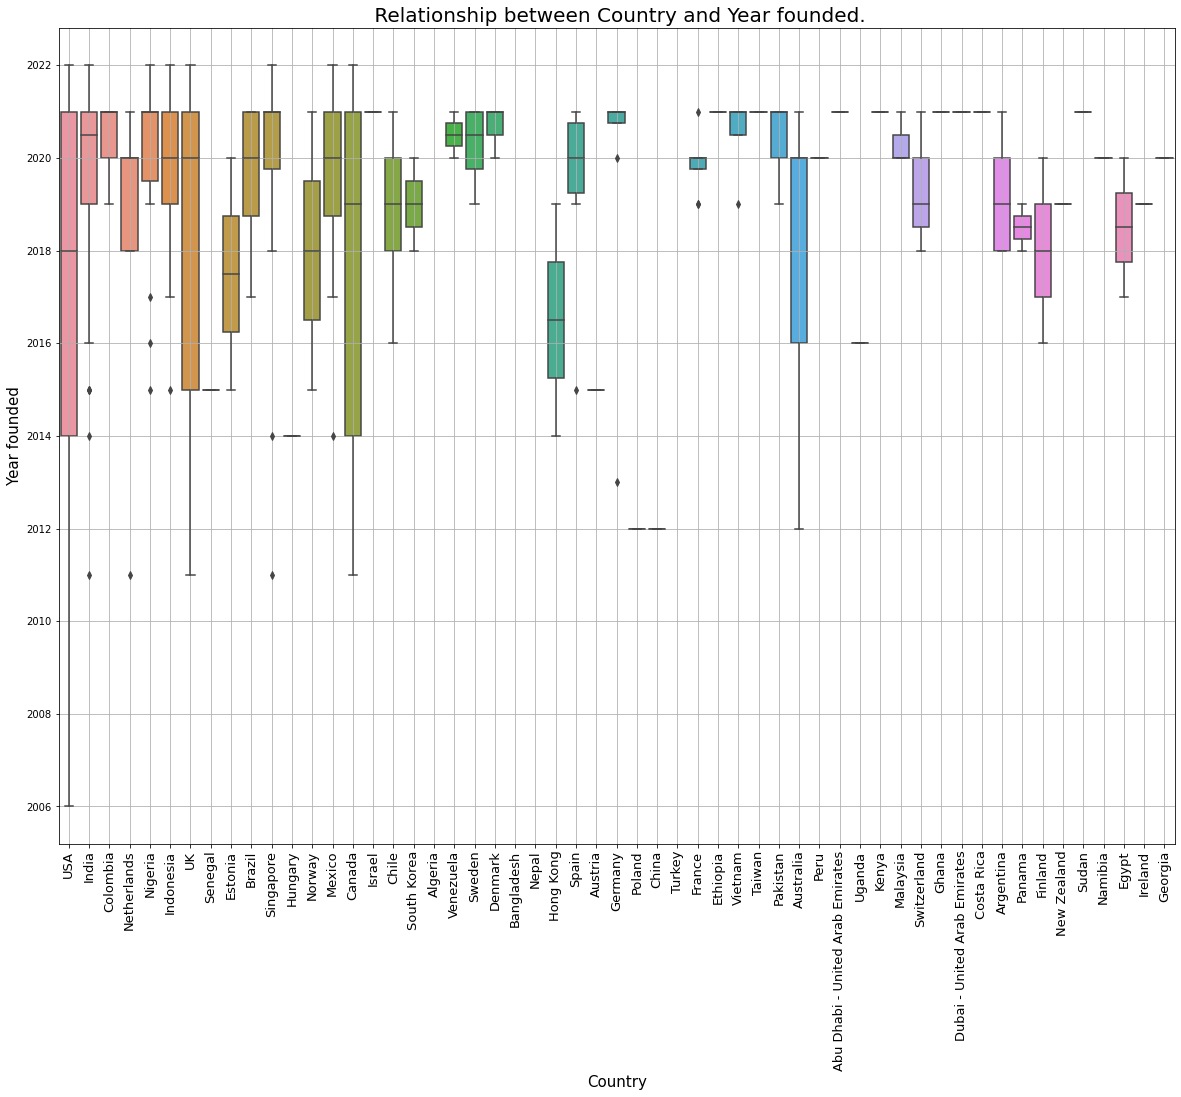

In [30]:
# Set the plot size.
plt.figure(figsize = (20,15))
ax = sns.boxplot(x= "Country", y = "Founded", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 13)

# Label axis.
plt.xlabel("Country",fontsize = 15)
plt.ylabel("Year founded",fontsize = 15)
plt.grid()

# Title.
plt.title(" Relationship between Country and Year founded.", fontsize = 20)

# plt.savefig('output5.png', facecolor = 'w')

plt.show()

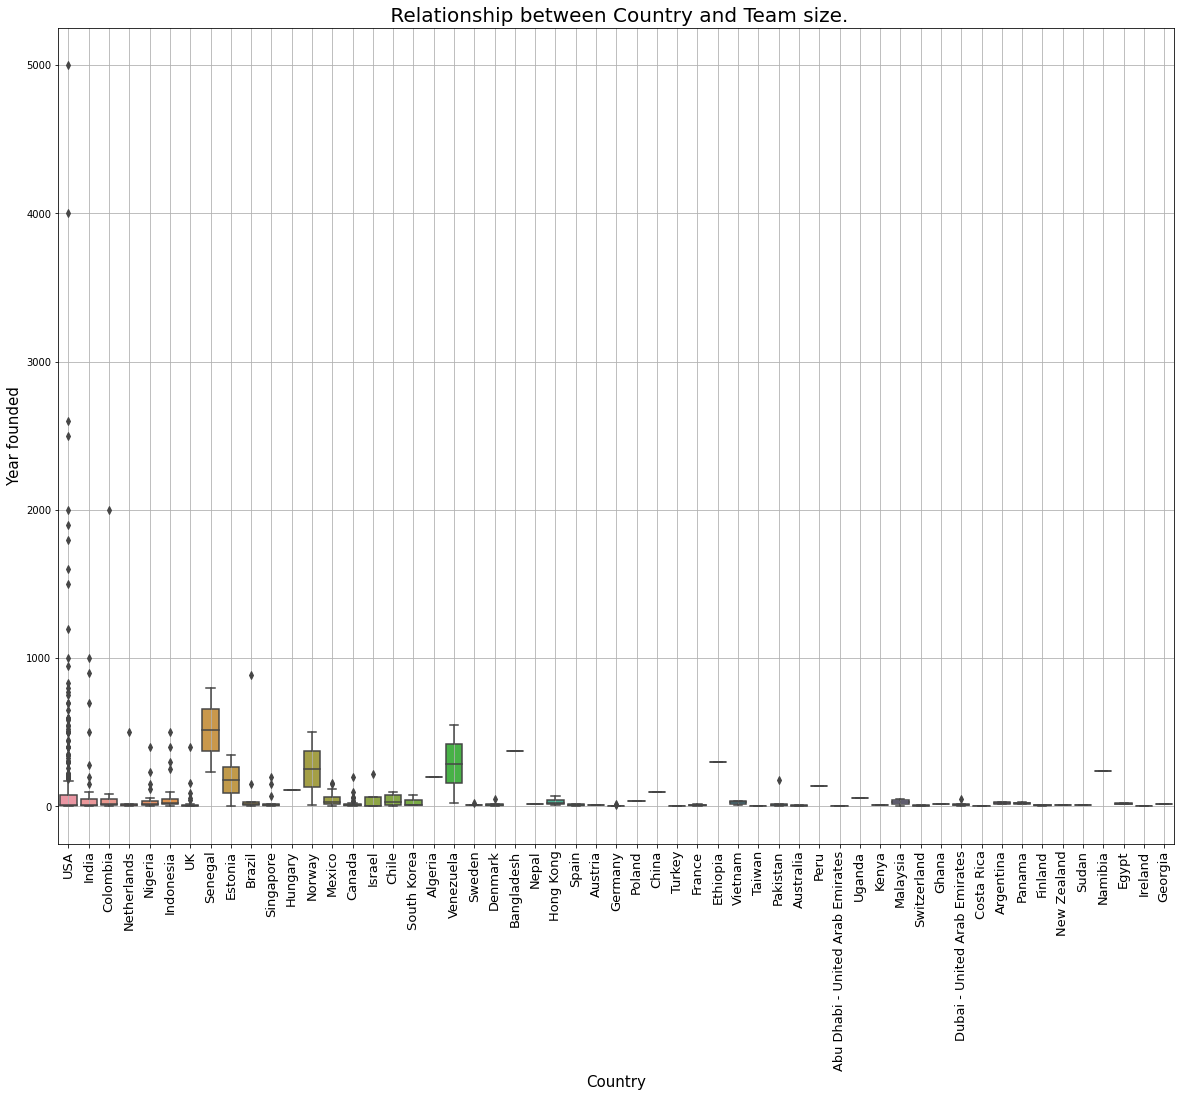

In [31]:
# Set the plot size.
plt.figure(figsize = (20,15))
ax = sns.boxplot(x= "Country", y = "Team_size", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 13)

# Label axis.
plt.xlabel("Country",fontsize = 15)
plt.ylabel("Year founded",fontsize = 15)
plt.grid()

# Title.
plt.title(" Relationship between Country and Team size.", fontsize = 20)

# plt.savefig('output6.png', facecolor = 'w')

plt.show()

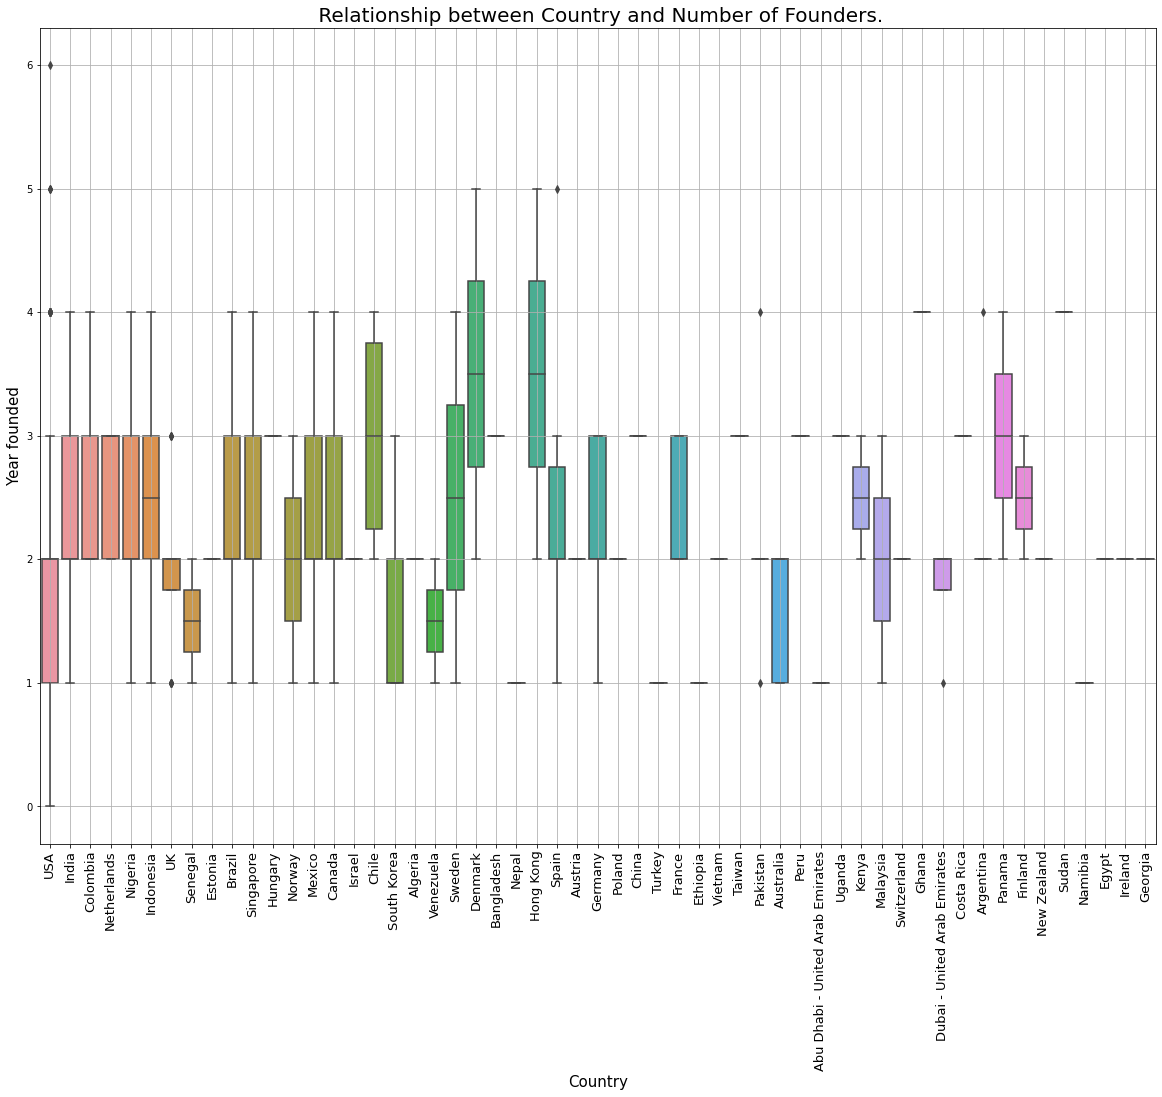

In [32]:
# Set the plot size.
plt.figure(figsize = (20,15))
ax = sns.boxplot(x= "Country", y = "Number_of_founders", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 13)


# Label axis.
plt.xlabel("Country",fontsize = 15)
plt.ylabel("Year founded",fontsize = 15)
plt.grid()

# Title.
plt.title(" Relationship between Country and Number of Founders.", fontsize = 20)

#plt.savefig('output7.png', facecolor = 'w')

plt.show()

In [33]:
# Correlation matrix.
df.corr()

,Founded,Team_size,Number_of_founders
Founded,1.000000,-0.338953,0.132399
Team_size,-0.338953,1.000000,0.034564
Number_of_founders,0.132399,0.034564,1.000000


No noticeable correlation between these 3 features.

#### SUMMARY
From the univariate and bivariate analysis, some inferences were drawn. Some of the notable ones are:
- The most represented country in the observations is the USA with a total of 654 out of 1000 observations.
- Most of the companies in the observations was founded in the year 2021.
- Most of the team sizes in the observations falls within the range of 2-10 and a right-skewed image is noticed in that regard.
- 546 companies out of a 1000 had just 2 founders, followed by 214 companies with 1 founder and 191 companies with 3 founders. 
- There is no notable relationship between Country - Founded, Country - Team_size, and Country - Number_of_founders.